In [49]:
%pylab inline
import sklearn
import pandas as pd
import catboost
from catboost import CatBoostClassifier
from catboost import Pool, CatBoostRegressor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
%matplotlib inline
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [50]:
train = pd.read_csv('Task2_Train_Data_pro.csv', low_memory = False, delimiter =',')
pre_target = train['Pred_Target'].values
train.drop(['Buy_sesID'],axis=1,inplace = True )
train.drop(['Unnamed: 0'], axis =1, inplace = True)
train.drop(['Pred_Target'], axis =1, inplace = True)
train.head()

,Cli_ItemID,ttl_Cli,AVG_CLI,Item_CLI,Fre_Cli_Itm,IN_Fre_Ctg,Cli_Wd,Cli_T,Dur_Sec,Cli_buy,Item_bought_P90,Fir_Cli,Las_Cli,Item_avg_pric,AVG_Pric,Pri_ctg_P90,below_ctg_avg_pric,below_ctg_P90
0,214851326.0,8.0,2.0,3.0,1.0,1.0,5.0,3.0,255.0,3.0,1.0,0.0,0.0,1046.0,1923.025449,4920.6,1.0,1.0
1,214853248.0,8.0,2.0,1.0,0.0,0.0,5.0,3.0,0.0,1.0,1.0,0.0,0.0,837.0,2061.555292,48380.5,1.0,1.0
2,214853094.0,8.0,2.0,1.0,0.0,1.0,5.0,3.0,0.0,1.0,1.0,0.0,0.0,4188.0,1923.025449,4920.6,0.0,1.0
3,214853090.0,8.0,2.0,3.0,1.0,1.0,5.0,3.0,3117.0,3.0,1.0,1.0,1.0,4188.0,1923.025449,4920.6,0.0,1.0
4,214567333.0,4.0,1.0,1.0,0.0,1.0,7.0,2.0,0.0,1.0,1.0,0.0,0.0,837.0,2061.555292,48380.5,1.0,1.0


In [40]:
train_pool = Pool(train, pre_target)

In [41]:
model = CatBoostRegressor(iterations=2, depth=2, learning_rate=1, loss_function='RMSE')
model.fit(train_pool)

y_pred = model.predict(train)
roc_auc_score(pre_target,y_pred)

0:	learn: 0.4655956	total: 68.6ms	remaining: 68.6ms
1:	learn: 0.4512706	total: 133ms	remaining: 0us


0.745984063814593

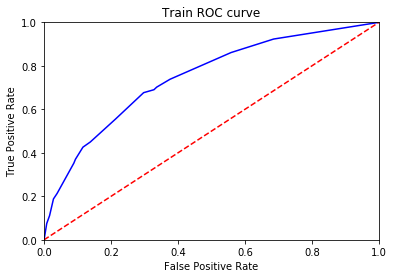

In [42]:
fpr, tpr, threshold = roc_curve(pre_target, y_pred)
df = pd.DataFrame(dict(fpr = fpr, tpr =tpr))
roc_auc = metrics.auc(fpr,tpr)

plt.title('Train ROC curve')
plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Validation

In [43]:
Valid = pd.read_csv('Task2_Validation_Data_pro.csv', low_memory = False, delimiter =',')
pre_target_V = Valid['Pred_Target'].values
Valid.drop(['Buy_sesID'], axis =1, inplace = True)
Valid.drop(['Unnamed: 0'], axis =1, inplace = True)
Valid.drop(['Pred_Target'], axis =1, inplace = True)
Valid.head()

,Cli_ItemID,ttl_Cli,AVG_CLI,Item_CLI,Fre_Cli_Itm,IN_Fre_Ctg,Cli_Wd,Cli_T,Dur_Sec,Cli_buy,Item_bought_P90,Fir_Cli,Las_Cli,Item_avg_pric,AVG_Pric,Pri_ctg_P90,below_ctg_avg_pric,below_ctg_P90
0,214854358.0,5.0,2.5,2.0,0.0,1.0,4.0,3.0,149.0,3.0,1.0,1.0,1.0,1360.0,1923.025449,4920.6,1.0,1.0
1,214859126.0,5.0,2.5,3.0,1.0,1.0,4.0,3.0,946.0,3.0,1.0,1.0,1.0,1570.0,1923.025449,4920.6,1.0,1.0
2,214712244.0,3.0,1.0,1.0,0.0,1.0,3.0,4.0,0.0,1.0,1.0,1.0,1.0,947.0,2061.555292,48380.5,1.0,1.0
3,214676480.0,3.0,1.0,1.0,0.0,1.0,3.0,4.0,0.0,1.0,1.0,1.0,1.0,5538.0,2061.555292,48380.5,0.0,1.0
4,214690839.0,3.0,1.0,1.0,0.0,1.0,3.0,4.0,0.0,1.0,0.0,0.0,0.0,686.0,2061.555292,48380.5,1.0,1.0


In [44]:
test_pool = Pool(Valid, pre_target_V)
y_pred_V = model.predict(test_pool)
roc_auc_score(pre_target_V,y_pred_V)

0.7546938978671045

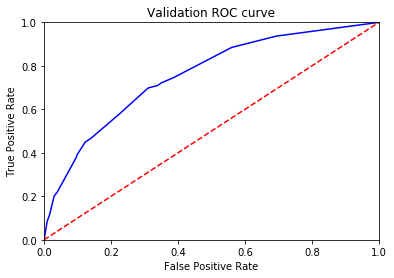

In [45]:
fpr, tpr, threshold = roc_curve(pre_target_V, y_pred_V)
df = pd.DataFrame(dict(fpr = fpr, tpr =tpr))
roc_auc = metrics.auc(fpr,tpr)

plt.title('Validation ROC curve')
plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

CatBoostClassifier

In [51]:
model = CatBoostClassifier(iterations=2, depth=2, learning_rate=1, loss_function='Logloss', logging_level='Verbose')
model.fit(train, pre_target)

y_pred = model.predict(train)
roc_auc_score(pre_target,y_pred)

0:	learn: 0.6233150	total: 128ms	remaining: 128ms
1:	learn: 0.5895499	total: 251ms	remaining: 0us


0.690461880641174

In [52]:
y_pred_V2 = model.predict(Valid)
roc_auc_score(pre_target_V,y_pred_V2)

0.6950302328977631

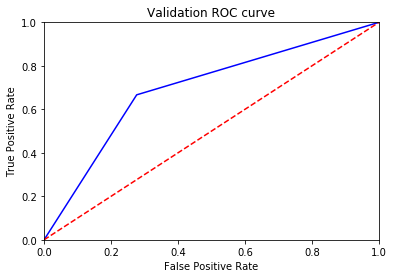

In [53]:
fpr, tpr, threshold = roc_curve(pre_target_V, y_pred_V2)
df = pd.DataFrame(dict(fpr = fpr, tpr =tpr))
roc_auc = metrics.auc(fpr,tpr)

plt.title('Validation ROC curve')
plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()